# **Building a PyTorch Model to Classify Playing Cards**

## **Introduction**

In recent years, deep learning has revolutionized the field of computer vision, enabling machines to perform complex image recognition tasks with remarkable accuracy. One of the most popular frameworks for deep learning is **PyTorch**, known for its flexibility, simplicity, and dynamic computation capabilities. This project aims to introduce the fundamentals of PyTorch by building an image classification model that can identify playing cards from a high-quality dataset.

Playing card recognition serves as an excellent entry point for learning deep learning concepts, given the structured nature of the dataset and the clear visual distinctions between different classes. Through this project, we will cover key deep learning workflows, from dataset preparation to model training and evaluation, while mastering PyTorch’s essential components like datasets, data loaders, models, and training loops.

By the end of this project, you'll not only have a robust playing card classifier but also a solid understanding of how to build and train deep learning models using PyTorch.


## **Dataset Description**

The dataset used in this project is a **high-quality collection of playing card images** designed specifically for image classification tasks. Here’s an overview of the dataset's key features:

- **Image Format & Quality:**  
  All images are in **JPG format** with dimensions **224 x 224 x 3** (RGB channels). The images are cropped to ensure that each card occupies **over 50%** of the frame, providing clear and consistent visuals for the model to learn from.

- **Dataset Size:**
  - **Training Set:** 7,624 images.
  - **Validation Set:** 265 images.
  - **Test Set:** 265 images.

- **Class Distribution:**  
  The dataset is organized into **53 subdirectories** within each partition (train, validation, test), representing each type of playing card (e.g., "ace of clubs," "king of hearts," "joker").

- **CSV File:**  
  The dataset includes a CSV file that maps image file paths to their corresponding labels, allowing for easy dataset loading and manipulation.

### **Sample Directory Structure**

```
/dataset
    /train
        /ace of clubs
        /ace of diamonds
        ...
        /joker
    /valid
        /ace of clubs
        /ace of diamonds
        ...
        /joker
    /test
        /ace of clubs
        /ace of diamonds
        ...
        /joker
    labels.csv
```


## **Project Objectives**

In this project, we aim to build a **playing card classification model** using PyTorch, covering the full model development pipeline. The key objectives include:

1. **Understanding PyTorch Datasets and Data Loaders:**  
   - Learn how to structure and load image data efficiently using custom dataset classes and data loaders.
   - Apply data transformations to standardize image input for the model.

2. **Building the PyTorch Model:**  
   - Utilize a pre-trained **EfficientNet** architecture for transfer learning, modifying the final layers to suit our 53-class classification problem.
   - Understand model architecture and layer connections in PyTorch.

3. **Training the Model:**  
   - Write a custom **training loop** to handle model training and validation.
   - Use common deep learning techniques like **backpropagation**, **loss calculation**, and **optimizer tuning**.

4. **Evaluating Model Performance:**  
   - Visualize training and validation performance using loss and accuracy plots.
   - Test the model on unseen data and visualize predictions to evaluate accuracy.

5. **Deploying and Improving the Model:**  
   - Suggest improvements like data augmentation, hyperparameter tuning, and experimenting with different architectures.

---

## **What We’ll Do in This Project**

Here’s a step-by-step overview of our project workflow:

1. **Setup and Preparation:**
   - Install and import the necessary libraries, including PyTorch, TorchVision, and timm (for model architectures).
   - Configure the environment to utilize **GPU acceleration** for faster training.

2. **Data Loading and Preprocessing:**
   - Load the dataset using PyTorch’s `Dataset` and `DataLoader` classes.
   - Apply **image transformations** (resize, normalization) to ensure consistent input dimensions for the model.

3. **Model Building:**
   - Leverage the **EfficientNet-B0** pre-trained model from the `timm` library.
   - Modify the final classification layer to output predictions for 53 card classes.

4. **Model Training:**
   - Define a **loss function** (`CrossEntropyLoss`) and an **optimizer** (`Adam`).
   - Write a training loop that handles **forward propagation**, **loss calculation**, **backpropagation**, and **weight updates**.
   - Include validation during training to monitor for **overfitting** or **underfitting**.

5. **Evaluation and Visualization:**
   - Plot **loss** and **accuracy** curves to visualize training performance.
   - Test the model on new images and display the predictions using **visualizations**.

6. **Final Evaluation and Accuracy Calculation:**
   - Calculate the final accuracy on the **test set** and explore model performance on individual images.

---

### **Playing Card Classification Using PyTorch: A Step-by-Step Guide**

In this project, we'll build a playing card classifier using **PyTorch**. Each step will include explanations of important PyTorch concepts to help you understand how deep learning models are built, trained, and evaluated.

## **1. Setup and Library Imports**

**What are we doing here?**  
We're importing the necessary libraries to build and train our model. PyTorch (`torch`) is our deep learning framework, and we'll use `torchvision` for image transformations and dataset handling. We also import `timm` to use pre-trained models.

In [1]:
# Importing Required Libraries
import torch  # Main PyTorch library
import torch.nn as nn  # For building neural network layers
import torch.optim as optim  # For optimization algorithms like Adam
from torch.utils.data import Dataset, DataLoader  # For dataset handling and batching
import torchvision.transforms as transforms  # For image preprocessing
from torchvision.datasets import ImageFolder  # To load images from folders
import timm  # For using pre-trained models like EfficientNet

import matplotlib.pyplot as plt  # For visualizations
import numpy as np  # For numerical operations
from tqdm.notebook import tqdm  # For progress bars
from PIL import Image  # For image loading and handling
from glob import glob  # For finding file paths
import sys  # To check system information


## **2. Dataset Class and Data Loading**
**Why is this important?**  
In PyTorch, data loading is handled through **custom datasets** and **data loaders**. This structure helps efficiently load and preprocess data in batches, which is crucial for training on large datasets.

In [2]:
# Dataset Class with Transformations
class PlayingCardDataset(Dataset):
    """
    Custom dataset class for loading playing card images.
    It uses ImageFolder to automatically label images based on folder names.
    """
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)  # Automatically labels images from folder names
    
    def __len__(self):
        return len(self.data)  # Returns the number of samples in the dataset
    
    def __getitem__(self, idx):
        return self.data[idx]  # Returns an image and its label at a given index
    
    @property
    def classes(self):
        return self.data.classes  # Returns the class names (card names)

# Transformations for Preprocessing Images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 (same as EfficientNet's expected input)
    transforms.ToTensor(),  # Convert images to PyTorch tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize pixel values to [-1, 1] range
])

# Dataset Paths
train_folder = '/kaggle/input/cards-image-datasetclassification/train'
valid_folder = '/kaggle/input/cards-image-datasetclassification/valid'
test_folder = '/kaggle/input/cards-image-datasetclassification/test'

# Loading Datasets with Transformations Applied
train_dataset = PlayingCardDataset(train_folder, transform=transform)
val_dataset = PlayingCardDataset(valid_folder, transform=transform)
test_dataset = PlayingCardDataset(test_folder, transform=transform)

# DataLoaders for Batching (Speeds up training by loading data in chunks)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)  # Shuffle during training for better generalization
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Displaying Sample Data
image, label = train_dataset[100]
print(f'Image shape: {image.shape}, Label: {label} ({train_dataset.classes[label]})')

Image shape: torch.Size([3, 224, 224]), Label: 0 (ace of clubs)


## **3. Building the PyTorch Model**

**Key PyTorch Concept:**
- **`nn.Module`:** All neural networks in PyTorch inherit from `nn.Module`. You define the layers in the `__init__` method and specify how data flows through them in the `forward` method.

In [3]:
# Defining the PyTorch Model
class SimpleCardClassifier(nn.Module):
    """
    A simple classifier using EfficientNet as the backbone.
    The final classification layer is customized for 53 card classes.
    """
    def __init__(self, num_classes=53):
        super(SimpleCardClassifier, self).__init__()
        
        # Load a pre-trained EfficientNet-B0 model from the timm library
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        
        # Remove the original classification layer of EfficientNet
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])
        
        # Add a custom classifier for 53 card classes with dropout for regularization
        self.classifier = nn.Sequential(
            nn.Flatten(),  # Flatten the output from the feature extractor
            nn.Dropout(0.5),  # Dropout to reduce overfitting
            nn.Linear(1280, num_classes)  # Final layer to classify 53 card types
        )
    
    def forward(self, x):
        x = self.features(x)  # Pass data through EfficientNet feature extractor
        output = self.classifier(x)  # Pass features through the custom classifier
        return output

# Move Model to GPU if Available for Faster Training
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = SimpleCardClassifier(num_classes=53).to(device)

# Display the Model Architecture
print(model)

model.safetensors:   0%|          | 0.00/21.4M [00:00<?, ?B/s]

SimpleCardClassifier(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (bn1): BatchNormAct2d(
            32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
            (drop): Identity()
            (act): SiLU(inplace=True)
          )
          (aa): Identity()
          (se): SqueezeExcite(
            (conv_reduce): Conv2d(32, 8, kernel_size=(1, 1), stride=(1, 1))
            (act1): SiLU(inplace=True)
            (conv_expand): Conv2d(8, 32, kernel_size=(1, 1), stride=(1, 1))
            (gate): Sigmoid()
          )
          (

## **4. Training and Evaluation Setup**

**Important Concepts:**
- **Loss Function:** Measures how far off the model's predictions are from the true labels. We'll use **CrossEntropyLoss** for multi-class classification.
- **Optimizer:** Updates the model's weights based on the loss. We'll use **Adam**, a popular choice for many deep learning tasks.

In [4]:
# Define Loss Function and Optimizer
criterion = nn.CrossEntropyLoss()  # Suitable for multi-class classification
optimizer = optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer with a learning rate of 0.001

# Function to Calculate Accuracy
def calculate_accuracy(outputs, labels):
    _, preds = torch.max(outputs, 1)  # Get the index of the highest probability as the predicted class
    correct = (preds == labels).sum().item()  # Count correct predictions
    return correct / labels.size(0)  # Return accuracy for the batch

## **5. Training the Model**

**Key PyTorch Concept:**
- **Training Loop:** The core of deep learning! We feed data to the model, compute the loss, and update the model weights through **backpropagation**.


In [5]:
# Training Loop
num_epochs = 5  # Number of times we’ll iterate over the entire dataset
train_losses, val_losses, train_accuracies, val_accuracies = [], [], [], []

for epoch in range(num_epochs):
    # Training Phase
    model.train()  # Set the model to training mode (enables dropout, batch norm, etc.)
    running_loss, running_corrects = 0.0, 0
    
    for images, labels in tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} - Training'):
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()  # Clear previous gradients
        outputs = model(images)  # Forward pass
        loss = criterion(outputs, labels)  # Calculate loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights
        
        running_loss += loss.item() * labels.size(0)  # Accumulate loss
        running_corrects += calculate_accuracy(outputs, labels) * labels.size(0)  # Accumulate accuracy
    
    train_loss = running_loss / len(train_loader.dataset)
    train_accuracy = running_corrects / len(train_loader.dataset)
    train_losses.append(train_loss)
    train_accuracies.append(train_accuracy)
    
    # Validation Phase (no backpropagation)
    model.eval()  # Set the model to evaluation mode
    running_loss, running_corrects = 0.0, 0
    
    with torch.no_grad():  # No gradients needed during validation
        for images, labels in tqdm(val_loader, desc='Validation'):
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item() * labels.size(0)
            running_corrects += calculate_accuracy(outputs, labels) * labels.size(0)
    
    val_loss = running_loss / len(val_loader.dataset)
    val_accuracy = running_corrects / len(val_loader.dataset)
    val_losses.append(val_loss)
    val_accuracies.append(val_accuracy)
    
    print(f"Epoch [{epoch+1}/{num_epochs}] - Train Loss: {train_loss:.4f}, Train Acc: {train_accuracy:.4f}, Val Loss: {val_loss:.4f}, Val Acc: {val_accuracy:.4f}")

Epoch 1/5 - Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validation:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch [1/5] - Train Loss: 1.5140, Train Acc: 0.5809, Val Loss: 0.3287, Val Acc: 0.9094


Epoch 2/5 - Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validation:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch [2/5] - Train Loss: 0.4390, Train Acc: 0.8781, Val Loss: 0.1972, Val Acc: 0.9396


Epoch 3/5 - Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validation:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch [3/5] - Train Loss: 0.2621, Train Acc: 0.9288, Val Loss: 0.1667, Val Acc: 0.9509


Epoch 4/5 - Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validation:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch [4/5] - Train Loss: 0.1977, Train Acc: 0.9436, Val Loss: 0.1107, Val Acc: 0.9660


Epoch 5/5 - Training:   0%|          | 0/239 [00:00<?, ?it/s]

Validation:   0%|          | 0/9 [00:00<?, ?it/s]

Epoch [5/5] - Train Loss: 0.1567, Train Acc: 0.9559, Val Loss: 0.0958, Val Acc: 0.9736


## **6. Visualizing Training Progress**

**Why visualize?**  
Visualizing the training and validation loss/accuracy helps us understand if the model is **overfitting** or **underfitting**.


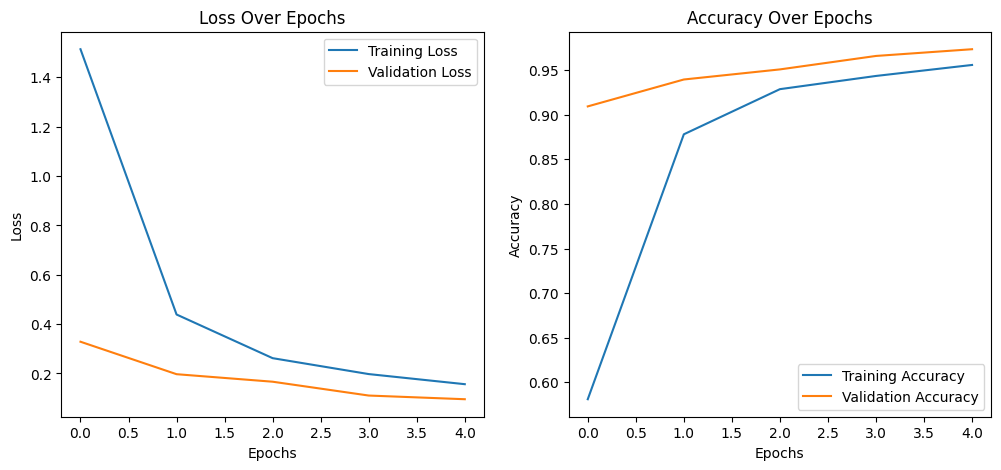

In [6]:
# Plotting Training and Validation Loss & Accuracy
plt.figure(figsize=(12, 5))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.title('Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(train_accuracies, label='Training Accuracy')
plt.plot(val_accuracies, label='Validation Accuracy')
plt.title('Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

## **7. Evaluating the Model on Test Data**

**What’s happening here?**  
We’ll evaluate the model on unseen test data and visualize the predictions to see how well it performs in real-world scenarios.


In [7]:
# Function to Evaluate the Model on Test Data
def evaluate_model(loader, model, device):
    model.eval()
    total_correct, total_samples = 0, 0
    
    with torch.no_grad():
        for images, labels in loader:
            images, labels = images.to(device), labels.to(device)
            outputs = model(images)
            total_correct += (outputs.argmax(1) == labels).sum().item()
            total_samples += labels.size(0)
    
    accuracy = total_correct / total_samples
    return accuracy

# Calculate and Display Test Accuracy
test_accuracy = evaluate_model(test_loader, model, device)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Test Accuracy: 96.98%
